In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
file_path = 'data/F1_sample_data_1000_consultora_with_date.csv'  # Replace with your actual CSV file path
data = pd.read_csv(file_path)

# Convert FECHAPROCESO to datetime
data['FECHAPROCESO'] = pd.to_datetime(data['FECHAPROCESO'])

# Filter the first 500 rows
data = data.head(500)

# Calculate Recency
latest_date = data['FECHAPROCESO'].max()
data['Recency'] = 1/((latest_date - data['FECHAPROCESO']).dt.days)

# Frequency by consultora
frequency = data.groupby('CODEBELISTA').size().reset_index(name='Frequency')

# Merge Frequency and Recency
recency = data.groupby('CODEBELISTA')['Recency'].min().reset_index()
rf_data = pd.merge(frequency, recency, on='CODEBELISTA')

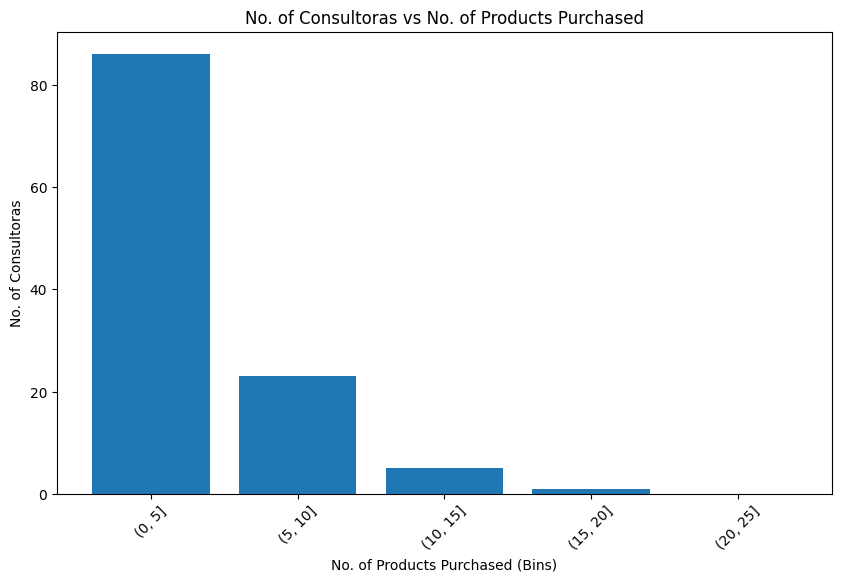

In [2]:
# ---- Plot 1: No. of Consultoras vs No. of Products Purchased ----
bins_products = np.arange(0, rf_data['Frequency'].max() + 1, 5)
rf_data['Frequency_bins'] = pd.cut(rf_data['Frequency'], bins=bins_products)
frequency_distribution = rf_data['Frequency_bins'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution.index.astype(str), frequency_distribution.values)
plt.title('No. of Consultoras vs No. of Products Purchased')
plt.xlabel('No. of Products Purchased (Bins)')
plt.ylabel('No. of Consultoras')
plt.xticks(rotation=45)
plt.show()

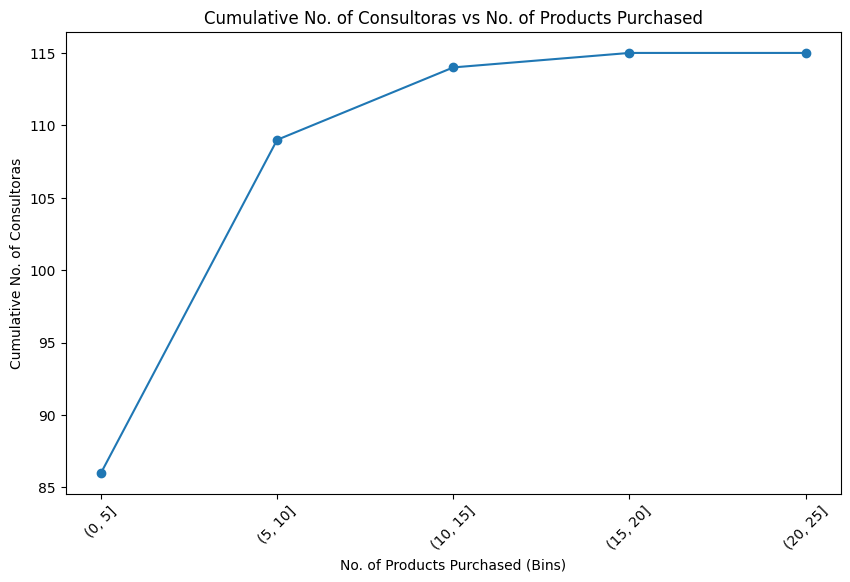

In [3]:
# ---- Plot 2: Cumulative Graph ----
cumulative_data = frequency_distribution.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_data.index.astype(str), cumulative_data.values, marker='o')
plt.title('Cumulative No. of Consultoras vs No. of Products Purchased')
plt.xlabel('No. of Products Purchased (Bins)')
plt.ylabel('Cumulative No. of Consultoras')
plt.xticks(rotation=45)
plt.show()

In [4]:
# ---- Plot 3: Heatmap (Recency vs Frequency) ----
alpha, beta = 0.5, 0.5
rf_data['Combined_Score'] = alpha * rf_data['Frequency'] + beta * rf_data['Recency']
bins_recency = np.linspace(0, rf_data['Recency'].max(), 10)
bins_frequency = np.linspace(0, rf_data['Frequency'].max(), 10)
rf_data['Recency_bins'] = pd.cut(rf_data['Recency'], bins=bins_recency)
rf_data['Frequency_bins'] = pd.cut(rf_data['Frequency'], bins=bins_frequency)

heatmap_data = rf_data.pivot_table(values='Combined_Score', 
                                   index='Frequency_bins', 
                                   columns='Recency_bins', 
                                   aggfunc='mean')

plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Combined Score')
plt.title('2D Heatmap: Recency vs Frequency')
plt.xlabel('Recency (Bins)')
plt.ylabel('Frequency (Bins)')
plt.xticks(range(len(heatmap_data.columns)), [str(i) for i in heatmap_data.columns], rotation=45)
plt.yticks(range(len(heatmap_data.index)), [str(i) for i in heatmap_data.index])
plt.show()

/Users/mindstix/Documents/baseline_COP2/venv/lib/python3.12/site-packages/numpy/_core/function_base.py:162: RuntimeWarning: invalid value encountered in multiply
  y *= step


ValueError: bins must increase monotonically.

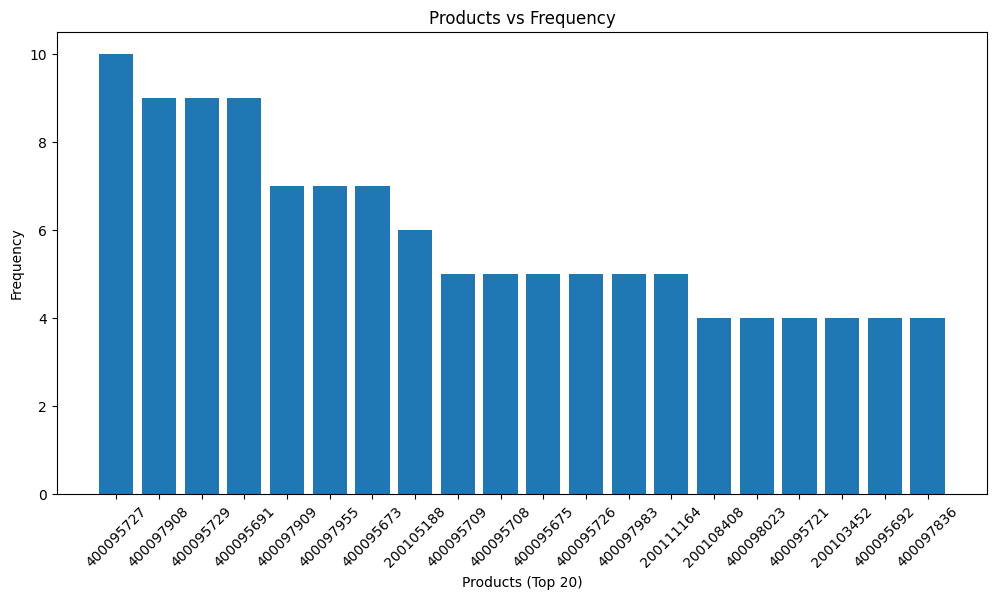

In [ ]:
# ---- Plot 4: Products vs Frequency ----
product_frequency = data['CODPRODUCTOSAP'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(product_frequency.index.astype(str)[:20], product_frequency.values[:20])  # Top 20 products for clarity
plt.title('Products vs Frequency')
plt.xlabel('Products (Top 20)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

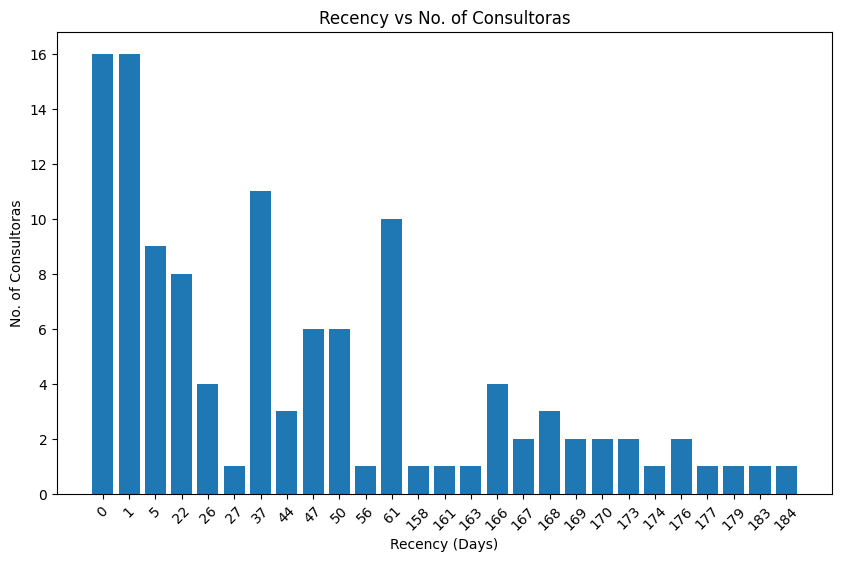

In [ ]:

# ---- Plot 5: Recency vs No. of Consultoras ----
recency_distribution = rf_data['Recency'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(recency_distribution.index.astype(str), recency_distribution.values)
plt.title('Recency vs No. of Consultoras')
plt.xlabel('Recency (Days)')
plt.ylabel('No. of Consultoras')
plt.xticks(rotation=45)
plt.show()

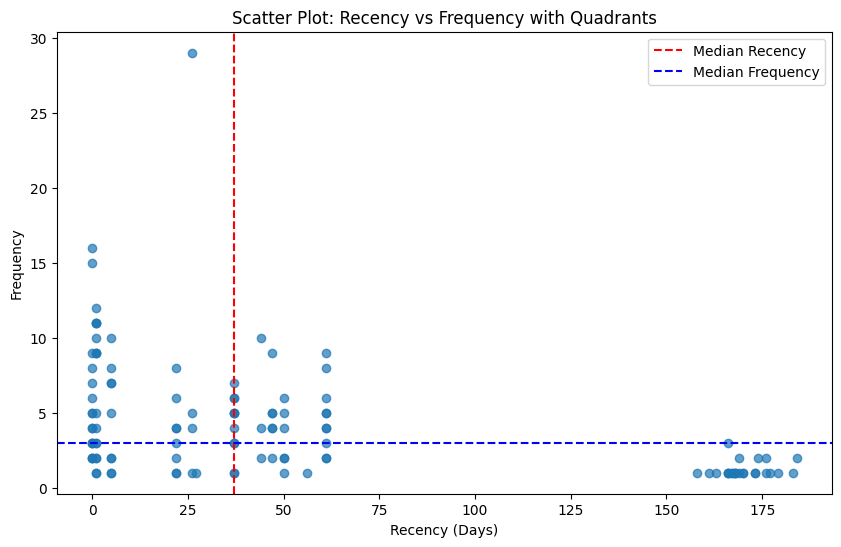

In [ ]:
# ---- Plot 6: Scatter Plot with Quadrants ----
median_recency = rf_data['Recency'].median()
median_frequency = rf_data['Frequency'].median()

plt.figure(figsize=(10, 6))
plt.scatter(rf_data['Recency'], rf_data['Frequency'], alpha=0.7)
plt.axvline(median_recency, color='red', linestyle='--', label='Median Recency')
plt.axhline(median_frequency, color='blue', linestyle='--', label='Median Frequency')
plt.title('Scatter Plot: Recency vs Frequency with Quadrants')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()
